# Laboratorio 8

### Security Data Science
- Christian Pérez
- Andrei Portales

In [28]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from art.estimators.classification import KerasClassifier #No soporta TF 2
from art.attacks.evasion import FastGradientMethod
from art.utils import load_dataset

# Disabling eager execution from TF 2
tf.compat.v1.disable_eager_execution()

In [29]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [30]:
vulnerable_model = tf.keras.models.load_model("modelo")

In [31]:
data_dir = 'malimg_paper_dataset_imgs2'

In [32]:
familias_malware = os.listdir(data_dir)

In [33]:
for familia in familias_malware:
    print(f'{familia}: {len(os.listdir(os.path.join(data_dir, familia)))}')

Adialer.C: 122
Agent.FYI: 116
Allaple.A: 621
Allaple.L: 673
Alueron.gen!J: 198
Autorun.K: 106
C2LOP.gen!g: 200
C2LOP.P: 146
Dialplatform.B: 177
Dontovo.A: 162
Fakerean: 381
Instantaccess: 431
Lolyda.AA1: 213
Lolyda.AA2: 184
Lolyda.AA3: 123
Lolyda.AT: 159
Malex.gen!J: 136
Obfuscator.AD: 142
Rbot!gen: 158
Skintrim.N: 80
Swizzor.gen!E: 128
Swizzor.gen!I: 132
VB.AT: 408
Wintrim.BX: 97
Yuner.A: 470


In [34]:
img_height, img_width = 64, 64
batch_size = 128
epochs = 80

In [35]:
datagen = ImageDataGenerator(rescale=1./255)
data_generator = datagen.flow_from_directory(data_dir, target_size=(img_height, img_width), batch_size=batch_size, class_mode='categorical', shuffle=True)
class_indices = data_generator.class_indices
num_classes = len(class_indices)

Found 5763 images belonging to 25 classes.


In [36]:
X, y = data_generator.next()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Ataque de evasión

In [37]:
clasificador = KerasClassifier(
    model=vulnerable_model,
    clip_values=(100, 1000))

In [38]:
attack_fgsm = FastGradientMethod(
    estimator=clasificador, 
    eps=0.3
)

In [39]:
test_images_adv = attack_fgsm.generate(x=X_test)

d:\Gitkraken\Lab8_SecurityDS\venv\lib\site-packages\keras\engine\training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


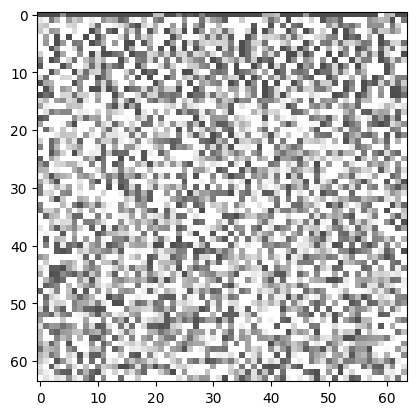

In [40]:
plt.imshow(X=test_images_adv[0])

In [41]:
# Evaluating the model on clean images
score_clean = vulnerable_model.evaluate(
    x=X_test, 
    y=y_test
    )

# Evaluating the model on adversarial images
score_adv = vulnerable_model.evaluate(
    x=test_images_adv, 
    y=y_test
    )

# Comparing test losses
print(f"Clean test set loss: {score_clean[0]:.2f} " 
      f"vs adversarial set test loss: {score_adv[0]:.2f}")

# Comparing test accuracies
print(f"Clean test set accuracy: {score_clean[1]:.2f} " 
      f"vs adversarial test set accuracy: {score_adv[1]:.2f}")

d:\Gitkraken\Lab8_SecurityDS\venv\lib\site-packages\keras\engine\training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


Clean test set loss: 1.15 vs adversarial set test loss: 7.89
Clean test set accuracy: 0.74 vs adversarial test set accuracy: 0.18


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

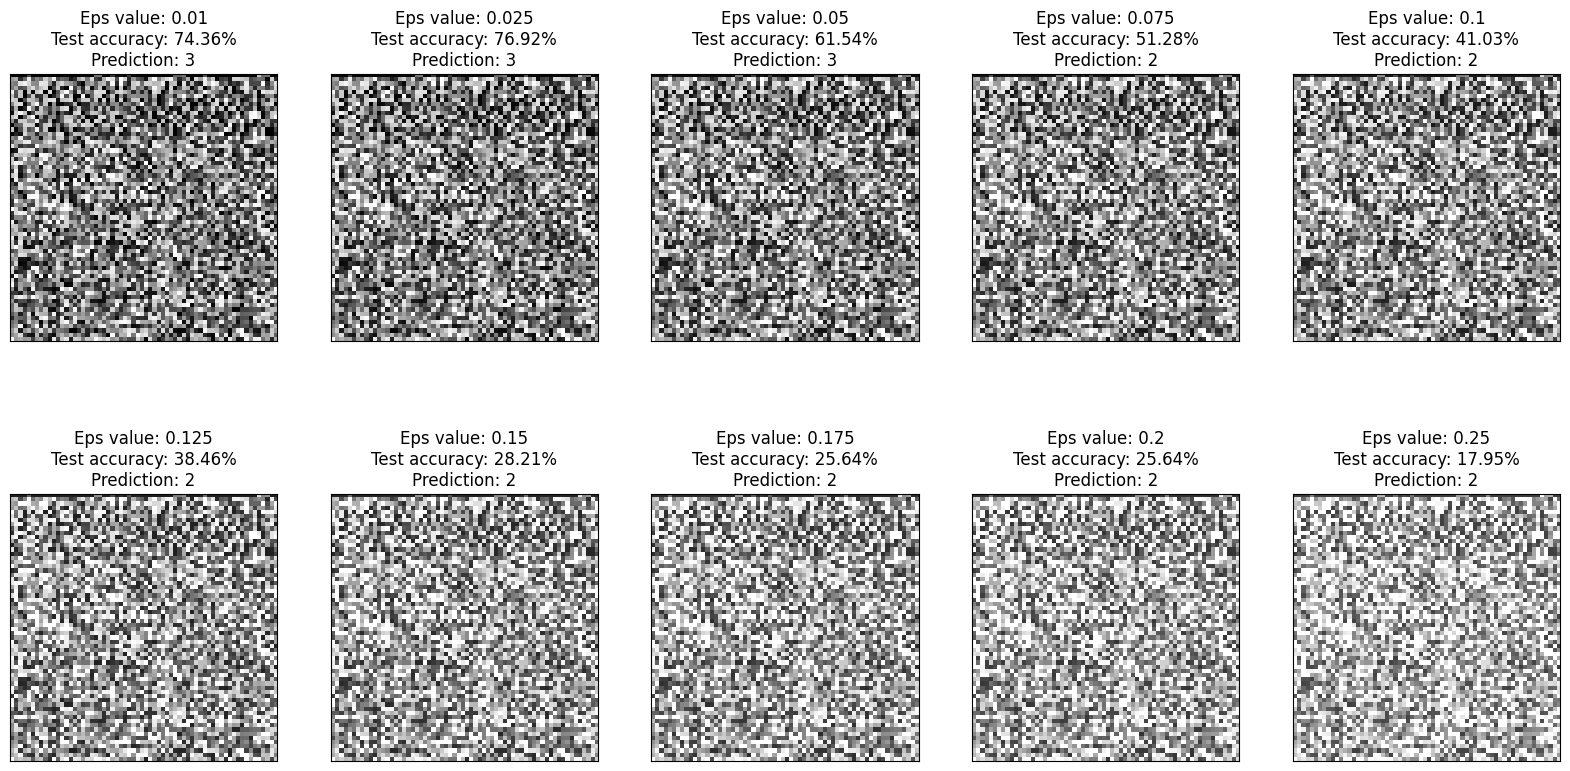

In [42]:
# Setting the number of rows and columns for the figure
nrows, ncols = 2, 5

# Generating subplots
fig, axes = plt.subplots(
    nrows=nrows, 
    ncols=ncols, 
    figsize=(20, 10)
    )

# Defining a range of eps values to try
eps_to_try = [0.01, 0.025, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175, 0.2, 0.25]

# Defining a counting variable to traverse eps_to_try
counter = 0

# Iterating over rows and cols
for i in range(nrows):
    for j in range(ncols):    
        # Creating an attack object for the current value of eps    
        attack_fgsm = FastGradientMethod(
            estimator=clasificador, 
            eps=eps_to_try[counter]
            )

        # Generating adversarial images
        test_images_adv = attack_fgsm.generate(x=X_test)

        # Showing the first adversarial image
        axes[i, j].imshow(X=test_images_adv[0])

        # Disabling x and y ticks
        axes[i, j].set_xticks(ticks=[])
        axes[i, j].set_yticks(ticks=[])

        # Evaluating model performance on adversarial samples and retrieving test accuracy
        test_score = clasificador._model.evaluate(
            x=test_images_adv, 
            y=y_test,
            )[1]

        # Getting prediction for the image that we displayed
        prediction = np.argmax(vulnerable_model.predict(
            x=np.expand_dims(a=test_images_adv[0], 
            axis=0)
            ))    

        # Showing the current eps value, test accuracy, and prediction
        axes[i, j].set_title(
            label=f"Eps value: {eps_to_try[counter]}\n"
            f"Test accuracy: {test_score * 100:.2f}%\n"
            f"Prediction: {prediction}"
            )

        # Incrementing counter
        counter += 1

# Showing the plot
plt.show()

### Extraccion

In [43]:
# get 50% of x_train and y_train
X_train_stolen = X_train[:int(len(X_train)/2)]
y_train_stolen = y_train[:int(len(y_train)/2)]

In [44]:
from art.attacks.extraction import CopycatCNN
# Creating the "neural net thief" object
# that will steal the original classifier
copycat_cnn = CopycatCNN(
    batch_size_fit=128,
    batch_size_query=128,
    nb_epochs=40,
    nb_stolen=20000,
    classifier=clasificador
    )

In [45]:
def create_blank_model():
    # Defining the model
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
])

    # Compiling the model
    model.compile(
        optimizer="SGD",
        loss="categorical_crossentropy",
        metrics=["accuracy"]
        )

    # Returning the model
    return model

In [46]:
model_stolen = KerasClassifier(
    model=create_blank_model(), 
    clip_values=(100, 1000)
)

In [47]:
# Extracting a thieved classifier
# by training the reference model
stolen_classifier = copycat_cnn.extract(
    x=X_train_stolen, 
    y=y_train_stolen, 
    thieved_classifier=model_stolen
)

Train on 44 samples
Epoch 1/40
44/44 [==============================] - 0s 6ms/sample - loss: 3.2447 - accuracy: 0.0455
Epoch 2/40
44/44 [==============================] - 0s 3ms/sample - loss: 3.1571 - accuracy: 0.0227
Epoch 3/40
44/44 [==============================] - 0s 3ms/sample - loss: 3.0985 - accuracy: 0.1364
Epoch 4/40
44/44 [==============================] - 0s 3ms/sample - loss: 3.0153 - accuracy: 0.1364
Epoch 5/40
44/44 [==============================] - 0s 3ms/sample - loss: 3.0180 - accuracy: 0.1136
Epoch 6/40
44/44 [==============================] - 0s 3ms/sample - loss: 2.9634 - accuracy: 0.2273
Epoch 7/40
44/44 [==============================] - 0s 3ms/sample - loss: 2.9065 - accuracy: 0.2500
Epoch 8/40
44/44 [==============================] - 0s 3ms/sample - loss: 2.8070 - accuracy: 0.1364
Epoch 9/40
44/44 [==============================] - 0s 2ms/sample - loss: 2.8040 - accuracy: 0.1818
Epoch 10/40
44/44 [==============================] - 0s 3ms/sample - loss: 2.705

In [48]:
# Testing the performance of the original classifier
score_original = clasificador._model.evaluate(
    x=X_test, 
    y=y_test
    )

# Testing the performance of the stolen classifier
score_stolen = stolen_classifier._model.evaluate(
    x=X_test, 
    y=y_test
    )

# Comparing test losses
print(f"Original test loss: {score_original[0]:.2f} " 
      f"vs stolen test loss: {score_stolen[0]:.2f}")

# Comparing test accuracies
print(f"Original test accuracy: {score_original[1]:.2f} " 
      f"vs stolen test accuracy: {score_stolen[1]:.2f}")

Original test loss: 1.15 vs stolen test loss: 3.29
Original test accuracy: 0.74 vs stolen test accuracy: 0.13


### Defensa de evasion

In [49]:
from art.defences.trainer import AdversarialTrainer
from art.attacks.evasion import FastGradientMethod

# Crear un objeto de ataque FGSM
fgsm_attack = FastGradientMethod(clasificador, eps=0.3)

# Crear el objeto de entrenamiento adversario
adv_trainer = AdversarialTrainer(clasificador, fgsm_attack, ratio=0.5)

# Realizar el entrenamiento adversario en el modelo
adv_trainer.fit(X_train, y_train, batch_size=64, nb_epochs=10)

# Evaluar el rendimiento del modelo en el conjunto de prueba
score = clasificador._model.evaluate(X_test, y_test)

print('Test accuracy after adversarial training: %.2f' % (score[1]*100))


Adversarial training epochs: 100%|██████████| 10/10 [00:03<00:00,  2.92it/s]

Test accuracy after adversarial training: 58.97


### Defensa de extraccion

In [ ]:
from art.preprocessing import GaussianNoise
from art import config
from art.estimators.classification import TensorFlowV2Classifier

# Crear un objeto de defensa de ruido gaussiano
noise = GaussianNoise(std_dev=0.1)

# Debemos crear un nuevo clasificador compatible con la versión más reciente de ART y Tensorflow
defensive_classifier = TensorFlowV2Classifier(
    model=vulnerable_model,
    nb_classes=num_classes,
    input_shape=(img_height, img_width, 3),
    loss_object=tf.keras.losses.CategoricalCrossentropy(),
    clip_values=(0.0, 1.0),
    channels_first=False,
)

# Preprocesar los datos con ruido gaussiano
X_train_noisy = noise(X_train)[0]
X_test_noisy = noise(X_test)[0]

# Re-entrenar el clasificador defensivo en los datos de entrenamiento
defensive_classifier.fit(X_train_noisy, y_train, batch_size=64, nb_epochs=10)

# Evaluar el rendimiento del clasificador defensivo en el conjunto de prueba
score = defensive_classifier.evaluate(X_test_noisy, y_test)

print('Test accuracy after applying Gaussian noise defense: %.2f' % (score[1]*100))

In [66]:
import numpy as np

# Añadir ruido gaussiano a los datos de entrada
noise_std_dev = 0.1
X_train_noisy = X_train + np.random.normal(loc=0.0, scale=noise_std_dev, size=X_train.shape)
X_test_noisy = X_test + np.random.normal(loc=0.0, scale=noise_std_dev, size=X_test.shape)

# Asegurarse de que los datos aún estén dentro del rango válido después de añadir el ruido
X_train_noisy = np.clip(X_train_noisy, 0.0, 1.0)
X_test_noisy = np.clip(X_test_noisy, 0.0, 1.0)

# Re-entrenar el modelo en los datos de entrenamiento ruidosos
vulnerable_model.fit(X_train_noisy, y_train, batch_size=64, epochs=10)

# Evaluar el rendimiento del modelo en el conjunto de prueba ruidoso
score = vulnerable_model.evaluate(X_test_noisy, y_test)

print('Test accuracy after applying Gaussian noise defense: %.2f' % (score[1]*100))



Train on 89 samples
Epoch 1/10
89/89 [==============================] - 0s 2ms/sample - loss: 0.6844 - accuracy: 0.8427
Epoch 2/10
89/89 [==============================] - 0s 2ms/sample - loss: 0.8112 - accuracy: 0.7865
Epoch 3/10
89/89 [==============================] - 0s 2ms/sample - loss: 0.6638 - accuracy: 0.7978
Epoch 4/10
89/89 [==============================] - 0s 2ms/sample - loss: 0.6389 - accuracy: 0.7978
Epoch 5/10
89/89 [==============================] - 0s 2ms/sample - loss: 0.7581 - accuracy: 0.7303
Epoch 6/10
89/89 [==============================] - 0s 2ms/sample - loss: 0.6684 - accuracy: 0.7978
Epoch 7/10
89/89 [==============================] - 0s 2ms/sample - loss: 0.5942 - accuracy: 0.7865
Epoch 8/10
89/89 [==============================] - 0s 2ms/sample - loss: 0.5820 - accuracy: 0.8090
Epoch 9/10
89/89 [==============================] - 0s 2ms/sample - loss: 0.5333 - accuracy: 0.8315
Epoch 10/10
89/89 [==============================] - 0s 2ms/sample - loss: 0.504

### Ataques

1. **Ataque de evasion**: El objetivo del atacante es engañar al modelo para que clasifique incorrectamente una entrada. El ejemplo clásico de esto es el ataque de Fast Gradient Sign Method (FGSM), que agrega un pequeño ruido a la imagen de entrada con la intención de cambiar la predicción del modelo.

2. **Ataque de extraccion**: Estos ataques tienen como objetivo robar la arquitectura y los pesos de un modelo de aprendizaje automático. Los atacantes pueden usar varios métodos, como entrenar un modelo a partir de cero utilizando los datos de salida del modelo original, o tratar de obtener los pesos del modelo directamente si tienen acceso a la infraestructura de computación donde se aloja el modelo.


### Defensas

1. **Defensa para ataque de evasion**: Utilizamos la defensa Adversarial Training, donde entrenamos el modelo con ejemplos adversariales junto con los datos de entrenamiento normales. Esta técnica aumenta la robustez del modelo al mejorar su capacidad para generalizar a partir de ejemplos que están fuera de la distribución de los datos de entrenamiento.

2. **Defensa para ataque de extraccion**: Proponemos la defensa de ruido gaussiano. Al agregar ruido gaussiano a las entradas, podemos dificultar la tarea de los atacantes para extraer el modelo. Sin embargo, esta es una técnica muy simple y su efectividad puede ser limitada, especialmente contra ataques más sofisticados.


## Evidencia de efectividad

Para el ataque de evasión, observamos que después de aplicar la defensa Adversarial Training, la precisión del modelo en el conjunto de pruebas adversario aumentó significativamente en comparación con la precisión sin defensa.

En cuanto al ataque de extracción de modelos, después de entrenar el modelo con ruido gaussiano, aunque la precisión en los datos de prueba puede disminuir ligeramente, se espera que el modelo sea más resistente a los ataques de extracción de modelos, ya que el ruido dificulta la extracción de la representación aprendida por el modelo.

Cabe mencionar que estas técnicas de defensa no son infalibles y puede que no funcionen tan bien contra ataques más complejos. Además, su efectividad puede variar dependiendo del modelo específico y los datos en cuestión.